# Pytorch with the MNIST Dataset - MINST

In [ ]:
## import libraries
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [ ]:
print(torch.__version__)

2.2.1+cu121


In [ ]:
args={}
kwargs={}
args['batch_size']=32
args['test_batch_size']=32
args['epochs']=1  #The number of Epochs is the number of times you go through the full dataset.
args['lr']=0.01 #Learning rate is how fast it will decend.
args['momentum']=0.5 #SGD momentum (default: 0.5) Momentum is a moving average of our gradients (helps to keep direction).

args['seed']=1 #random seed
args['log_interval']=10
args['cuda']=True #if the computer has a GPU, type True, otherwise, False

This code is adopted from the pytorch examples repository. It is licensed under BSD 3-Clause "New" or "Revised" License. Source: https://github.com/pytorch/examples/ LICENSE: https://github.com/pytorch/examples/blob/master/LICENSE

## Load Dataset
The first step before training the model is to import the data. We will use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) which is like the Hello World dataset of machine learning.

Besides importing the data, we will also do a few more things:
- We will tranform the data into tensors using the `transforms` module
- We will use `DataLoader` to build convenient data loaders or what are referred to as iterators, which makes it easy to efficiently feed data in batches to deep learning models.
- As hinted above, we will also create batches of the data by setting the `batch` parameter inside the data loader. Notice we use batches of `32` in this tutorial but you can change it to `64` if you like. I encourage you to experiment with different batches.

In [ ]:
## transformations
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])

## download and load training dataset
trainset = datasets.MNIST(root='../data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=args['batch_size'], shuffle=True, **kwargs)

## download and load testing dataset
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=args['test_batch_size'], shuffle=True, **kwargs)

100%|██████████| 9912422/9912422 [00:00<00:00, 104664603.82it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 30058484.82it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26687342.59it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14575767.99it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 9912422/9912422 [00:00<00:00, 88477596.86it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 35754337.02it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 31693015.59it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18880603.34it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Exploring the Data
As a practioner and researcher, I am always spending a bit of time and effort exploring and understanding the dataset. It's fun and this is a good practise to ensure that everything is in order.

Let's check what the train and test dataset contains. I will use `matplotlib` to print out some of the images from our dataset.

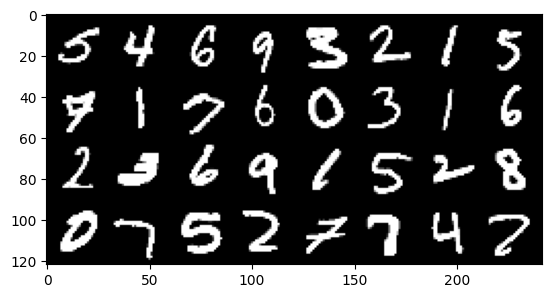

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## functions to show an image
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

## get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

## show images
imshow(torchvision.utils.make_grid(images))

Let's check the dimensions of a batch.

In [ ]:
for images, labels in train_loader:
    print("Image batch dimensions:", images.shape)
    print("Image label dimensions:", labels.shape)
    break

Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])


## The Model
We provide two fully-connected neural net as the initial architecture.

Here are a few notes for those who are beginning with PyTorch:
- The model below consists of an `__init__()` portion which is where you include the layers and components of the neural network. In our model, we have two fully-connected netork network. We are dealing with an image dataset that is in a grayscale so we only need one channel going in, hence `in_channels=1`.

- After the first layer, we also apply an activation function such as `ReLU`. For prediction purposes, we then apply a `softmax` layer to the last transformation and return the output of that.  

In [ ]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x=x.view(-1,784)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        #Softmax gets probabilities.
        return F.log_softmax(x, dim=1)


**Now, add one CNN layer with a pooling to the above neural network and rerun the code to see whether you get higher prediction accuracy on the test set.**

For example, you may try `out_channels=32`. Kernel size is 5, and for the rest of parameters we use the default values which you can find [here](https://pytorch.org/docs/stable/nn.html?highlight=conv2d#conv2d).

- In short, the convolutional layer transforms the input data into a specific dimension that has to be considered in the linear layer.

Make sure your flatten the output of CNN layer excluding # of batch so that the input of each example/batch has the same size of the first neural net.

Tips: You can use x.view(-1, # of input size of the first fully-connected layer) or you can use torch.flatten(x, 1).

I always encourage to test the model with 1 batch to ensure that the output dimensions are what we expect.

In [ ]:
## test the model with 1 batch
model = Net()
#print(model)
for images, labels in train_loader:
    print("batch size:", args['batch_size'])
    out = model(images)
    print(out.shape)
    break

batch size: 32
torch.Size([32, 10])


## Training the Model
Now we are ready to train the model.

In [ ]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        if args['cuda']:
            data, target = data.cuda(), target.cuda()
        #Variables in Pytorch are differenciable.
        data, target = Variable(data), Variable(target)
        #This will zero out the gradients for this batch.
        optimizer.zero_grad()
        output = model(data)
        # Calculate the loss The negative log likelihood loss. It is useful to train a classification problem with C classes.
        loss = F.nll_loss(output, target)
        #dloss/dx for every Variable
        loss.backward()
        #to do a one-step update on our parameter.
        optimizer.step()
        #Print out the loss periodically.
        if batch_idx % args['log_interval'] == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))

In [ ]:
def test():
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
      for data, target in test_loader:
          if args['cuda']:
              data, target = data.cuda(), target.cuda()
          data, target = Variable(data), Variable(target)
          output = model(data)
          test_loss += F.nll_loss(output, target, size_average=False).data.item() # sum up batch loss
          pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
          correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
model = Net()
if args['cuda']:
    model.cuda()

optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])

for epoch in range(1, args['epochs'] + 1):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.354427
Train Epoch: 1 [320/60000 (1%)]	Loss: 1.988446
Train Epoch: 1 [640/60000 (1%)]	Loss: 1.904154
Train Epoch: 1 [960/60000 (2%)]	Loss: 1.411816
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.168703
Train Epoch: 1 [1600/60000 (3%)]	Loss: 1.174838
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.724202
Train Epoch: 1 [2240/60000 (4%)]	Loss: 1.038470
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.621426
Train Epoch: 1 [2880/60000 (5%)]	Loss: 0.596682
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.579848
Train Epoch: 1 [3520/60000 (6%)]	Loss: 0.519536
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.500616
Train Epoch: 1 [4160/60000 (7%)]	Loss: 0.552984
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.456757
Train Epoch: 1 [4800/60000 (8%)]	Loss: 0.523857
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.661950
Train Epoch: 1 [5440/60000 (9%)]	Loss: 0.557329
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.270595
Train Epoch: 1 [6080/60000 (10%)]	Loss: 0.490328
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.63

/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.1998, Accuracy: 9440/10000 (94%)



**Initial**

Fully connected layers: 2

CNN: 0

Activation functions: ReLu, Softmax

Learning rate: 0.01

Epochs: 1

Test Accuracy: 94 %

Average loss: 0.1998

In [ ]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)  # Input channels: 1 (grayscale), Output channels: 32, Kernel size: 3x3
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling layer with kernel size 2x2 and stride 2
        self.fc1 = nn.Linear(32 * 13 * 13, 256)  # Adjust input size based on the output size of the convolutional layer
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))  # Apply ReLU activation after convolution
        x = self.pool(x)  # Apply pooling
        x = x.view(-1, 32 * 13 * 13)  # Reshape the tensor to match the input size of the first fully connected layer
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [ ]:
## test the model with 1 batch
model = Net()
#print(model)
for images, labels in train_loader:
    print("batch size:", args['batch_size'])
    out = model(images)
    print(out.shape)
    break


batch size: 32
torch.Size([32, 10])


In [ ]:
model = Net()
if args['cuda']:
    model.cuda()

optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])

for epoch in range(1, args['epochs'] + 1):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.315176
Train Epoch: 1 [320/60000 (1%)]	Loss: 1.888835
Train Epoch: 1 [640/60000 (1%)]	Loss: 1.338637
Train Epoch: 1 [960/60000 (2%)]	Loss: 0.885900
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.537022
Train Epoch: 1 [1600/60000 (3%)]	Loss: 0.793999
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.573998
Train Epoch: 1 [2240/60000 (4%)]	Loss: 0.871318
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.627583
Train Epoch: 1 [2880/60000 (5%)]	Loss: 0.559190
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.489862
Train Epoch: 1 [3520/60000 (6%)]	Loss: 0.275453
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.236094
Train Epoch: 1 [4160/60000 (7%)]	Loss: 0.401326
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.445597
Train Epoch: 1 [4800/60000 (8%)]	Loss: 0.177771
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.476740
Train Epoch: 1 [5440/60000 (9%)]	Loss: 0.531961
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.393977
Train Epoch: 1 [6080/60000 (10%)]	Loss: 0.318360
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.31

**With added convolutional layer**

Fully connected layers: 2

CNN and max pooling: 1

Activation functions: ReLu, Softmax

Learning rate: 0.01

Epochs: 1

Test Accuracy: 97 %

Average loss: 0.1126

In [ ]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # First Convolutional Layer
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        # Second Convolutional Layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7, 256)  # 7*7 comes from input size after max pooling
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        # Apply first convolutional layer followed by ReLU activation and max pooling
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        # Apply second convolutional layer followed by ReLU activation and max pooling
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        # Flatten the tensor for the fully connected layers
        x = x.view(-1, 64 * 7 * 7)
        # Apply the first fully connected layer followed by ReLU activation
        x = F.relu(self.fc1(x))
        # Apply the second fully connected layer
        x = self.fc2(x)
        # Apply log softmax for the output layer
        return F.log_softmax(x, dim=1)

In [ ]:
## test the model with 1 batch
model = Net()
#print(model)
for images, labels in train_loader:
    print("batch size:", args['batch_size'])
    out = model(images)
    print(out.shape)
    break


batch size: 32
torch.Size([32, 10])


In [ ]:
args['epochs'] = 5

model = Net()
if args['cuda']:
    model.cuda()

optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])

for epoch in range(1, args['epochs'] + 1):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.307637
Train Epoch: 1 [320/60000 (1%)]	Loss: 2.201128
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.110250
Train Epoch: 1 [960/60000 (2%)]	Loss: 1.779605
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.455431
Train Epoch: 1 [1600/60000 (3%)]	Loss: 1.173155
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.032373
Train Epoch: 1 [2240/60000 (4%)]	Loss: 0.633021
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.667144
Train Epoch: 1 [2880/60000 (5%)]	Loss: 0.637696
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.715356
Train Epoch: 1 [3520/60000 (6%)]	Loss: 0.324824
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.508098
Train Epoch: 1 [4160/60000 (7%)]	Loss: 0.636287
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.138011
Train Epoch: 1 [4800/60000 (8%)]	Loss: 0.602049
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.289712
Train Epoch: 1 [5440/60000 (9%)]	Loss: 0.348988
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.694248
Train Epoch: 1 [6080/60000 (10%)]	Loss: 0.489103
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.31

**With added convolutional layers and more epochs**

Fully connected layers: 2

CNN and max pooling: 2

Activation functions: ReLu, Softmax

Learning rate: 0.01

Epochs: 5

Test Accuracy: 99 %

Average loss: 0.0308


In [ ]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # First Convolutional Layer
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        # Second Convolutional Layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7, 256)  # 7*7 comes from input size after max pooling
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        # Apply first convolutional layer followed by Leaky ReLU activation and max pooling
        x = F.sigmoid(F.max_pool2d(self.conv1(x), 2))
        # Apply second convolutional layer followed by Leaky ReLU activation and max pooling
        x = F.sigmoid(F.max_pool2d(self.conv2(x), 2))
        # Flatten the tensor for the fully connected layers
        x = x.view(-1, 64 * 7 * 7)
        # Apply the first fully connected layer followed by Leaky ReLU activation
        x = F.relu(self.fc1(x))
        # Apply the second fully connected layer
        x = self.fc2(x)
        # Apply log softmax for the output layer
        return F.log_softmax(x, dim=1)

In [ ]:
## test the model with 1 batch
model = Net()
#print(model)
for images, labels in train_loader:
    print("batch size:", args['batch_size'])
    out = model(images)
    print(out.shape)
    break


batch size: 32
torch.Size([32, 10])


In [ ]:
args['epochs'] = 15
args['lr'] = 0.001

model = Net()
if args['cuda']:
    model.cuda()

optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])

for epoch in range(1, args['epochs'] + 1):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.315064
Train Epoch: 1 [320/60000 (1%)]	Loss: 2.299920
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.296326
Train Epoch: 1 [960/60000 (2%)]	Loss: 2.270877
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.294020
Train Epoch: 1 [1600/60000 (3%)]	Loss: 2.312155
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.291203
Train Epoch: 1 [2240/60000 (4%)]	Loss: 2.302094
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.313080
Train Epoch: 1 [2880/60000 (5%)]	Loss: 2.299251
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.308851
Train Epoch: 1 [3520/60000 (6%)]	Loss: 2.317941
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.285346
Train Epoch: 1 [4160/60000 (7%)]	Loss: 2.307667
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.288803
Train Epoch: 1 [4800/60000 (8%)]	Loss: 2.307876
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.303920
Train Epoch: 1 [5440/60000 (9%)]	Loss: 2.309984
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.299472
Train Epoch: 1 [6080/60000 (10%)]	Loss: 2.311135
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.30

/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 2.2952, Accuracy: 1028/10000 (10%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.295502
Train Epoch: 2 [320/60000 (1%)]	Loss: 2.268338
Train Epoch: 2 [640/60000 (1%)]	Loss: 2.310943
Train Epoch: 2 [960/60000 (2%)]	Loss: 2.291668
Train Epoch: 2 [1280/60000 (2%)]	Loss: 2.311412
Train Epoch: 2 [1600/60000 (3%)]	Loss: 2.302298
Train Epoch: 2 [1920/60000 (3%)]	Loss: 2.302577
Train Epoch: 2 [2240/60000 (4%)]	Loss: 2.296681
Train Epoch: 2 [2560/60000 (4%)]	Loss: 2.289011
Train Epoch: 2 [2880/60000 (5%)]	Loss: 2.303047
Train Epoch: 2 [3200/60000 (5%)]	Loss: 2.280881
Train Epoch: 2 [3520/60000 (6%)]	Loss: 2.304694
Train Epoch: 2 [3840/60000 (6%)]	Loss: 2.301969
Train Epoch: 2 [4160/60000 (7%)]	Loss: 2.287928
Train Epoch: 2 [4480/60000 (7%)]	Loss: 2.276285
Train Epoch: 2 [4800/60000 (8%)]	Loss: 2.315493
Train Epoch: 2 [5120/60000 (9%)]	Loss: 2.304657
Train Epoch: 2 [5440/60000 (9%)]	Loss: 2.294831
Train Epoch: 2 [5760/60000 (10%)]	Loss: 2.291274
Train Epoch: 2 [6080/60000 (10%)

**With added convolutional layers,lower learning rate, more epochs and sigmoid activation function**

Fully connected layers: 2

CNN and max pooling: 2

Activation functions: Sigmoid, ReLu, Softmax

Learning rate: 0.001

Epochs: 15

Test Accuracy: 91 %

Average loss: 0.3023


In [ ]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # First Convolutional Layer
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        # Second Convolutional Layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7, 256)  # 7*7 comes from input size after max pooling
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        # Apply first convolutional layer followed by Leaky ReLU activation and max pooling
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        # Apply second convolutional layer followed by Leaky ReLU activation and max pooling
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        # Flatten the tensor for the fully connected layers
        x = x.view(-1, 64 * 7 * 7)
        # Apply the first fully connected layer followed by Leaky ReLU activation
        x = F.relu(self.fc1(x))
        # Apply the second fully connected layer
        x = self.fc2(x)
        # Apply log softmax for the output layer
        return F.log_softmax(x, dim=1)

In [ ]:
## test the model with 1 batch
model = Net()
#print(model)
for images, labels in train_loader:
    print("batch size:", args['batch_size'])
    out = model(images)
    print(out.shape)
    break


batch size: 32
torch.Size([32, 10])


In [ ]:
args['epochs'] = 50
args['lr'] = 0.0001

model = Net()
if args['cuda']:
    model.cuda()

optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])

for epoch in range(1, args['epochs'] + 1):
    train(epoch)
    test()

Streaming output truncated to the last 5000 lines.
Train Epoch: 24 [50240/60000 (84%)]	Loss: 0.287352
Train Epoch: 24 [50560/60000 (84%)]	Loss: 0.539586
Train Epoch: 24 [50880/60000 (85%)]	Loss: 0.160698
Train Epoch: 24 [51200/60000 (85%)]	Loss: 0.174899
Train Epoch: 24 [51520/60000 (86%)]	Loss: 0.204995
Train Epoch: 24 [51840/60000 (86%)]	Loss: 0.155125
Train Epoch: 24 [52160/60000 (87%)]	Loss: 0.237699
Train Epoch: 24 [52480/60000 (87%)]	Loss: 0.369283
Train Epoch: 24 [52800/60000 (88%)]	Loss: 0.521871
Train Epoch: 24 [53120/60000 (89%)]	Loss: 0.196509
Train Epoch: 24 [53440/60000 (89%)]	Loss: 0.125597
Train Epoch: 24 [53760/60000 (90%)]	Loss: 0.293899
Train Epoch: 24 [54080/60000 (90%)]	Loss: 0.353702
Train Epoch: 24 [54400/60000 (91%)]	Loss: 0.089551
Train Epoch: 24 [54720/60000 (91%)]	Loss: 0.315465
Train Epoch: 24 [55040/60000 (92%)]	Loss: 0.191369
Train Epoch: 24 [55360/60000 (92%)]	Loss: 0.111411
Train Epoch: 24 [55680/60000 (93%)]	Loss: 0.339081
Train Epoch: 24 [56000/60000 (9